# Importação de mapas de geopackages e criação de imagens deles

In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True)
#from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/josea/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/josea/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [2]:
covid_gpkg = "covid-pt-2020-04-20.gpkg" + "|layername=concelho"
vlayer = QgsVectorLayer(covid_gpkg, "Concelhos", "ogr")
if not vlayer.isValid():
    print("Layer failed to load!")
else:
    QgsProject.instance().addMapLayer(vlayer)
    print("Layer loaded")

Layer loaded


In [3]:
covid_gpkg = "covid-pt-2020-04-20.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer concelho loaded
Layer distrito loaded
Layer raa_central_concelho loaded
Layer raa_central_ilha loaded
Layer raa_ocidental_concelho loaded
Layer raa_ocidental_ilha loaded
Layer raa_oriental_concelho loaded
Layer raa_oriental_ilha loaded
Layer ram_concelho loaded
Layer ram_ilha loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer confirmados_distrito_ilha loaded
Layer situacao_epidemiologica loaded


In [4]:
concelho = QgsProject.instance().mapLayersByName('concelho')[0]

In [5]:
for c in concelho.getFeatures():
    print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_20/04/2020"]))

Em ÁGUEDA há 42 caso(s) confirmados
Em ALBERGARIA-A-VELHA há 57 caso(s) confirmados
Em ANADIA há 20 caso(s) confirmados
Em AROUCA há 30 caso(s) confirmados
Em AVEIRO há 237 caso(s) confirmados
Em CASTELO DE PAIVA há 8 caso(s) confirmados
Em ESPINHO há 56 caso(s) confirmados
Em ESTARREJA há 56 caso(s) confirmados
Em SANTA MARIA DA FEIRA há 340 caso(s) confirmados
Em ÍLHAVO há 91 caso(s) confirmados
Em MEALHADA há 13 caso(s) confirmados
Em MURTOSA há 8 caso(s) confirmados
Em OLIVEIRA DE AZEMÉIS há 150 caso(s) confirmados
Em OLIVEIRA DO BAIRRO há 18 caso(s) confirmados
Em OVAR há 511 caso(s) confirmados
Em SÃO JOÃO DA MADEIRA há 52 caso(s) confirmados
Em SEVER DO VOUGA há 28 caso(s) confirmados
Em VAGOS há 15 caso(s) confirmados
Em VALE DE CAMBRA há 92 caso(s) confirmados
Em ALJUSTREL há NULL caso(s) confirmados
Em ALMODÔVAR há 3 caso(s) confirmados
Em ALVITO há NULL caso(s) confirmados
Em BARRANCOS há NULL caso(s) confirmados
Em BEJA há 9 caso(s) confirmados
Em CASTRO VERDE há NULL caso(

In [6]:
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

In [7]:
xt = concelho.extent()
# print(xt)
width = 600
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))
options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()
image = render.renderedImage()

Gerar mapa com 600 por 1229


In [8]:
from IPython.display import Image

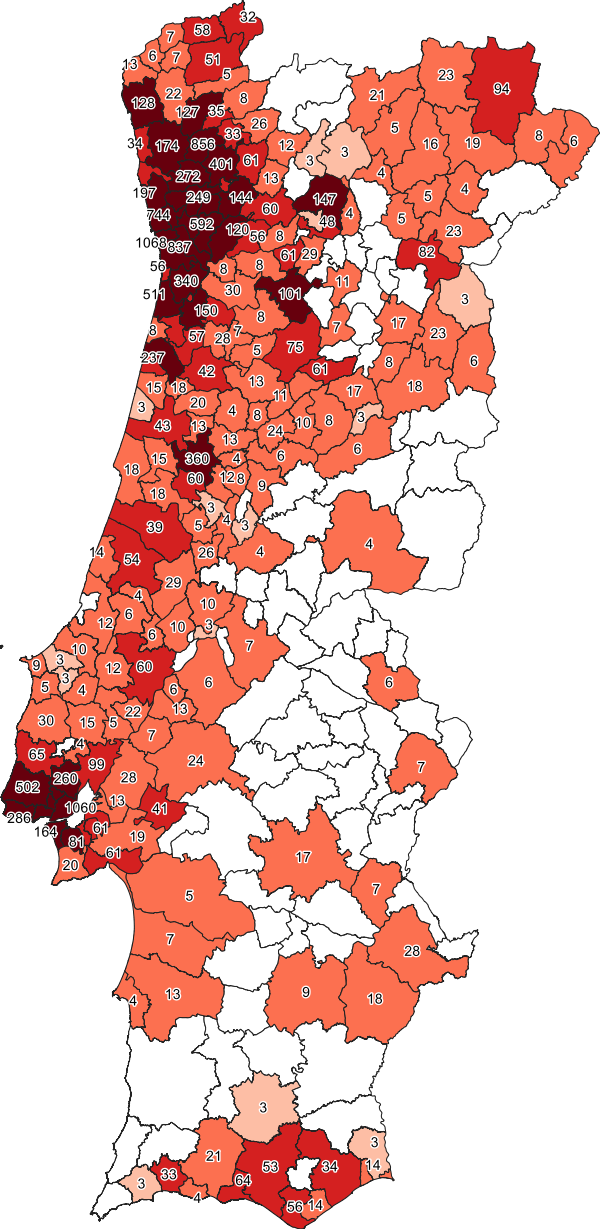

In [9]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('portugal_vermelho_concelhos.png',"PNG")
Image( imgbuf.data() )

Foi criada a imagem portugal_vermelho_concelhos.png com o mapa de Portugal, sendo que se encontra graduado conforme o número de casos de COVID-19 presente em cada um dos concelhos.

In [10]:
distrito = QgsProject.instance().mapLayersByName('distrito')[0]

In [11]:
for c in distrito.getFeatures():
    print("Em {} há {} caso(s) confirmados".format(c["distrito"], c["confirmados_distrito_20/04/2020"]))

Em AVEIRO há 1824 caso(s) confirmados
Em BEJA há 58 caso(s) confirmados
Em BRAGA há 2105 caso(s) confirmados
Em BRAGANÇA há 203 caso(s) confirmados
Em CASTELO BRANCO há 14 caso(s) confirmados
Em COIMBRA há 606 caso(s) confirmados
Em ÉVORA há 24 caso(s) confirmados
Em FARO há 299 caso(s) confirmados
Em GUARDA há 185 caso(s) confirmados
Em LEIRIA há 192 caso(s) confirmados
Em LISBOA há 2922 caso(s) confirmados
Em PORTALEGRE há 13 caso(s) confirmados
Em PORTO há 6866 caso(s) confirmados
Em SANTARÉM há 243 caso(s) confirmados
Em SETÚBAL há 628 caso(s) confirmados
Em VIANA DO CASTELO há 329 caso(s) confirmados
Em VILA REAL há 238 caso(s) confirmados
Em VISEU há 423 caso(s) confirmados


In [12]:
xt = distrito.extent()
# print(xt)
width = 650
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))
options = QgsMapSettings()
options.setLayers([distrito])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()
image = render.renderedImage()

Gerar mapa com 650 por 1331


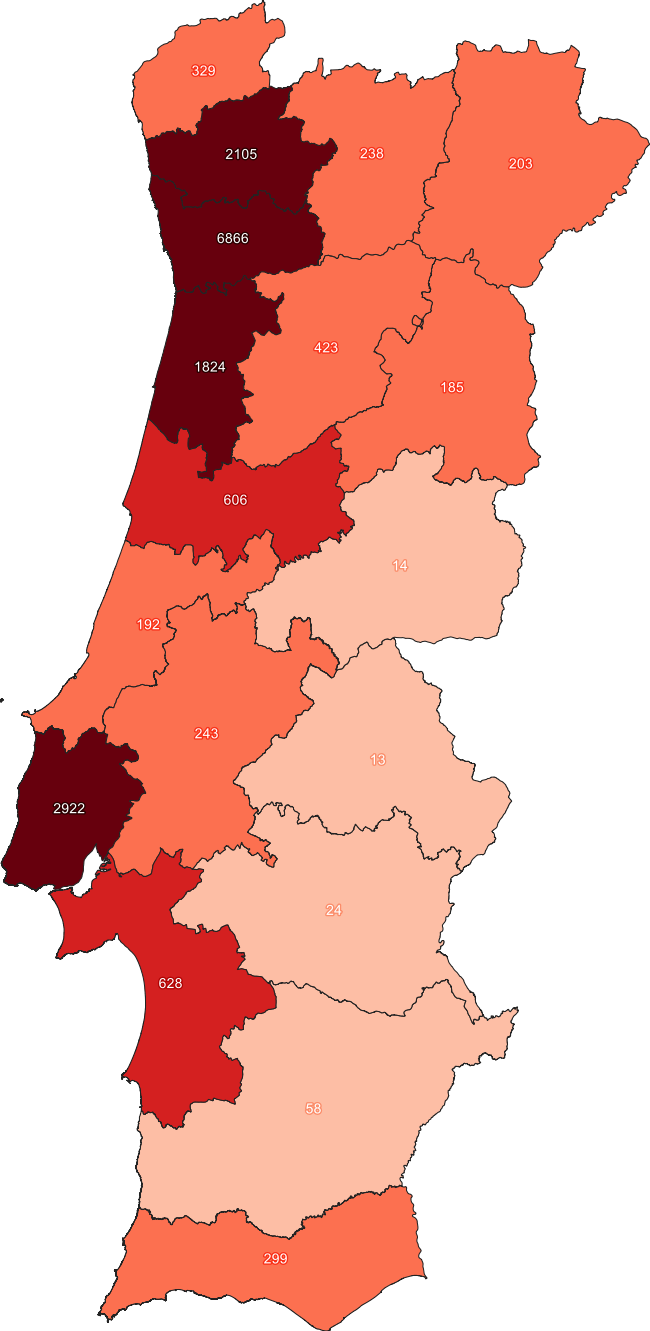

In [13]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('portugal_vermelho_distritos.png',"PNG")
Image( imgbuf.data() )

Foi criada a imagem portugal_vermelho_distritos.png com o mapa de Portugal, sendo que se encontra graduado conforme o número de casos de COVID-19 presente em cada um dos distritos.

In [14]:
qgs.exitQgis()